<a href="https://colab.research.google.com/github/erickkush/Baltimore-Crime-Analysis/blob/main/Baltimore_Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirements

In [ ]:
!pip install sodapy
!pip install geopandas 
!pip install requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
from shapely.geometry import point, Polygon
from sodapy import Socrata 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 31.9 MB/s 
     |████████████████████████████████| 16.6 MB 58.1 MB/s 
     |████████████████████████████████| 7.8 MB 55.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from google.colab import drive
#drive.mount("/content/drive")

In [ ]:
#crime_data = pd.read_csv("/content/drive/MyDrive/Crime Analysis/Part_1_Crime_Data_.csv")
#crime_data.tail(5)


Data Fetch

In [ ]:
client = Socrata("celebratingcities.data.socrata.com", None)
crime_data = client.get('7ifz-78pu',limit=10000)

Data preprocessing

In [ ]:
#formulating data into pandas dataframe 
df = pd.DataFrame.from_dict(crime_data, orient = 'columns')
#removing unwanted columns
df = df.drop(columns=['weapon','crimecode'])
df.head(2)


,crimedate,crimetime,location,description,post,district,neighborhood,location_1
0,2016-01-09T00:00:00.000,18:00:00,3800 EASTERN AVE,LARCENY,224,SOUTHEASTERN,Brewers Hill,"{'latitude': '39.28667', 'longitude': '-76.564..."
1,2016-01-09T00:00:00.000,18:20:00,NaN,AGG. ASSAULT,132,CENTRAL,NaN,"{'latitude': '39.30195', 'longitude': '-76.632..."


In [ ]:
#top 10 location descriptions and total crime occurring in that area
pd.value_counts(df['location'])[:10]


1500 RUSSELL ST        35
3400 WILKENS AVE       29
3500 BOSTON ST         28
6300 EASTERN AVE       25
4500 EDMONDSON AVE     24
3700 BOSTON ST         20
2000 W BALTIMORE ST    18
200 E PRATT ST         18
100 KANE ST            17
1800 ORLEANS ST        17
Name: location, dtype: int64

In [ ]:
#top 10 primary types and the rate of occurrence 
pd.value_counts(df['description'])[:10]

LARCENY                 2046
BURGLARY                1723
COMMON ASSAULT          1443
LARCENY FROM AUTO       1397
AUTO THEFT              1016
AGG. ASSAULT             849
ROBBERY - STREET         747
ROBBERY - COMMERCIAL     196
SHOOTING                 134
ASSAULT BY THREAT        120
Name: description, dtype: int64

In [ ]:
uniqueVals = df['description'].unique()
uniqueVals

array(['LARCENY', 'AGG. ASSAULT', 'BURGLARY', 'ROBBERY - STREET',
       'COMMON ASSAULT', 'AUTO THEFT', 'ARSON', 'ROBBERY - COMMERCIAL',
       'SHOOTING', 'ROBBERY - CARJACKING', 'LARCENY FROM AUTO',
       'ROBBERY - RESIDENCE', 'ASSAULT BY THREAT', 'HOMICIDE', 'RAPE'],
      dtype=object)

In [ ]:
#count of crime per month for entire data set
data = client.get('7ifz-78pu',select = "date_extract_m(crimedate) as month, count(*)",group="month")
df2 = pd.DataFrame.from_dict(data, orient = 'columns')
df2

,month,count
0,1,18977
1,2,15038
2,3,18792
3,4,19499
4,5,21987
5,6,21586
6,7,22286
7,8,22246
8,9,21029
9,10,21590


([<matplotlib.axis.XTick at 0x7f46d765a190>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'March'),
  Text(0, 0, 'April'),
  Text(0, 0, 'May'),
  Text(0, 0, 'June'),
  Text(0, 0, 'July'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sept'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

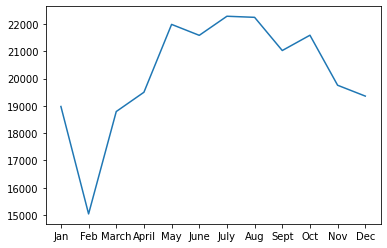

In [ ]:
#plotting rate of crimes for each month
import matplotlib.pyplot as plt
df2['month'] = df2['month'].astype(float)
df2['count'] = df2['count'].astype(float)

s_df2 = df2.sort_values(by=['month'])
plt.plot(s_df2['month'], s_df2['count'])
my_xticks = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(s_df2['month'], my_xticks)

In [ ]:
#count of primary type of crime for each month
#each number corresponds to the respective month
data = client.get('7ifz-78pu', select="date_extract_m(crimedate) as month, description, count(*)",group = "description,month")
df3 = pd.DataFrame.from_dict(data, orient = 'columns')
df3

,month,description,count
0,1,AGG. ASSAULT,1786
1,2,AGG. ASSAULT,1469
2,3,AGG. ASSAULT,2031
3,4,AGG. ASSAULT,2031
4,5,AGG. ASSAULT,2316
...,...,...,...
175,8,SHOOTING,240
176,9,SHOOTING,184
177,10,SHOOTING,146
178,11,SHOOTING,156


In [ ]:
labels = ""
bar = {}

In [ ]:
k = 0
#list of primary types
for l in labels:
  bar[l] = []
  #range of months
  for i in range(1,13):
    #month and type, append d else append 0
    d = s_df3.loc[np.logical_and(s_df3.month == i, s_df3.Description == 1)]['Count']
    if not d.empty:
      bar(l).append(d.values[0])
    else:
      bar(l).append(0)


In [ ]:
#randomize colors
import random
colors = []
for i in range(len(labels)):
  r = lambda:random.randit(0,255)
  colors.append('#%02X%02X%02X' % (r(),r(),r()))

count distribution of crime over 12 months

In [ ]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

#y-axis in bold
rc('font',weight='bold')
#height of bar1 and bar2
#bars = np.add(bar.get('AGG. ASSAULT'), bar.get('ARSON'))
#position of bars on the x-axis
r = [i for i in range(0,12)]
#name of group and bar_width
names = ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
barwidth = 1
bars = np.zeros(12)
for i, key in enumerate(bar.keys()):
  plt.bar(r, bar.get(key), bottom=bars, label=keys, color=colors[i], edgecolor='white', width=0.4)
  bars=np.add(bars, bar.get(key))
#custom x-axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel('group')
plt.legend(loc='upper center',bbox_to_anchor=(1.45,0.8), shadow=True, ncol=1)
#show graph
plt.show()

In [ ]:
data = client.get('7ifz-78pu', select = "description,count(*)",group = "description")
df4 = pd.DataFrame.from_dict(data, orient='columns')
df4

,description,count
0,AGG. ASSAULT,23212
1,ARSON,1283
2,ASSAULT BY THREAT,3026
3,AUTO THEFT,22355
4,BURGLARY,38570
5,COMMON ASSAULT,41225
6,HOMICIDE,1209
7,LARCENY,53801
8,LARCENY FROM AUTO,33544
9,RAPE,1439


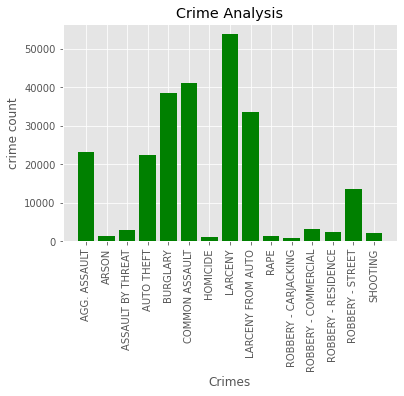

In [ ]:
#count for each primary type

#convert count from string to int
df4['count'] = df4['count'].astype(int)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = df4['description']
energy = df4['count']

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, energy, color='green')
plt.xlabel('Crimes')
plt.ylabel('crime count')
plt.title('Crime Analysis')
plt.xticks(x_pos,x,rotation='vertical')

plt.show()

In [ ]:
df.head(4)

In [ ]:
import folium
import matplotlib.pyplot as plt
import seaborn as sns

Baltimore_map = folium.Map(location = [39.28639, -76.61500],
                zoom_start = 11,
                tiles = "CartoDB dark_matter" )


In [ ]:
Baltimore_map

In [ ]:
data = client.get('7ifz-78pu', select = 'location_1',group = 'location_1')
df5 = pd.DataFrame.from_dict(data, orient='columns')
#separate location column into latitude and longitude columns
df5= pd.json_normalize(df5.location_1)
df5


,latitude,longitude
0,37.57726,-81.52919
1,39.24989,-76.64192
2,39.2443,-76.6329
3,39.24452,-76.63299
4,39.24465,-76.63319
...,...,...
995,39.23223,-76.59781
996,39.23228,-76.59778
997,39.23217,-76.59776
998,39.23182,-76.59866


Data visualization

Crime Data Plot

In [ ]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




data = client.get('7ifz-78pu', select="neighborhood, location, location_1, description",group = "neighborhood,location,location_1,description")
df5 = pd.DataFrame.from_dict(data, orient = 'columns')
df6 = pd.json_normalize(df5.location_1)
df5 = pd.concat([df5.drop(columns=['location_1'], axis=1), df6], axis=1)
Baltimore_map = folium.Map(location= [39.28639, -76.61500],
                zoom_start = 11,
                tiles = "CartoDB dark_matter" )


for i,row in df5.iterrows():
  #Setup the content of the popup
  popup_text = folium.Popup(f'Neighborhood: {str(row["neighborhood"])} <br> Location: {str(row["location"])} <br> Description: {str(row["description"])}')
  
 
  #Add each row to the map
  folium.CircleMarker(location=[row['latitude'],row['longitude']],
                popup = popup_text).add_to(Baltimore_map)
  
Baltimore_map

In [ ]:
df6

In [ ]:

#counting number of crimes in the same location
df6.columns = ['latitude','longitude']
loc = []
for i in range(0,len(df6)):
  temp = df6['latitude'][i] + "," +  df6['longitude'][i]
  loc.append(temp)
loc
#convert array to index
locat = pd.Index(loc)
locat

Index(['39.32361,-76.61115', '39.32421,-76.61111', '39.32361,-76.61115',
       '39.32361,-76.61115', '39.32361,-76.61115', '39.32361,-76.61115',
       '39.32361,-76.61115', '39.32361,-76.61115', '39.32361,-76.61115',
       '39.32361,-76.61115',
       ...
       '39.29192,-76.67948', '39.29192,-76.67948', '39.29192,-76.67948',
       '39.29193,-76.67948', '39.29197,-76.67948', '39.29186,-76.67955',
       '39.29198,-76.67955', '39.29042,-76.68906', '39.29042,-76.68906',
       '39.29202,-76.67547'],
      dtype='object', length=1000)

In [ ]:
unique_locations = locat.value_counts()
CR_index = pd.DataFrame({'Raw_String':unique_locations.index,"ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index

,Raw_String,ValueCount
0,"39.32731,-76.60945",12
1,"39.32347,-76.60947",11
2,"39.32361,-76.61115",9
3,"39.32749,-76.60946",9
4,"39.32728,-76.6111",8
...,...,...
612,"39.29024,-76.67939",1
613,"39.29022,-76.67939",1
614,"39.32639,-76.61337",1
615,"39.29025,-76.67946",1


Crime Intensity Plot

In [ ]:
%%time
Baltimore_map_crime = folium.Map(location = [39.28639, -76.61500],
                      zoom_start = 13,
                      tiles = "CartoDB dark_matter" )
for i in range(len(CR_index["Raw_String"][:500])):
  lat = float(CR_index["Raw_String"][i].split(",")[0])
  lon = float(CR_index["Raw_String"][i].split(",")[1])
  #corresponding circle size with respect to crimes
  radius = float(CR_index['ValueCount'].iloc[i]/1)
  if CR_index['ValueCount'].iloc[i] > 5:
    #red to represent high crime rate areas
    color = '#ff4500'
  else:
    #blue to represent low crime rate areas
    color = '#008080'
  popup_text  = """Latitude: {}<br>
                Longitude: {}<br>
                Criminal_Incidents: {}<br>"""
  popup_text = popup_text.format(lat,
                                 lon,
                                 CR_index['ValueCount'].iloc[i])
  folium.CircleMarker (location = [lat,lon], popup = popup_text, radius = radius, color = color, fill = True).add_to(Baltimore_map_crime)
Baltimore_map_crime
  

CPU times: user 63.8 ms, sys: 11.2 ms, total: 75.1 ms
Wall time: 77.3 ms
